In [95]:
# 참고 블로그
# https://dschloe.github.io/python/python_edu/07_deeplearning/deep_learning_lstm/

In [96]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
dataframe = pd.read_csv("C:/Users/wjddu/git/BigData/train/train_ori.csv")

In [98]:
dataframe

,date,year,month,day,hour,pow_gen,month.1,hour.1,temperature,humidity,dew_point,sol_rad,cloud
0,2016-12-13-14,2016,12,13,14,140.631,12,14,4.3,77,0.6,100.000,0
1,2016-12-13-15,2016,12,13,15,85.793,12,15,4.3,80,1.1,72.222,0
2,2016-12-13-16,2016,12,13,16,32.590,12,16,3.8,80,0.6,55.556,0
3,2016-12-13-17,2016,12,13,17,0.154,12,17,3.4,80,0.2,13.889,0
4,2016-12-13-18,2016,12,13,18,0.000,12,18,2.6,86,0.4,2.778,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35482,2020-12-31-19,2020,12,31,19,0.000,12,19,-0.9,65,-6.6,0.000,8
35483,2020-12-31-20,2020,12,31,20,0.000,12,20,-1.5,66,-7.0,0.000,8
35484,2020-12-31-21,2020,12,31,21,0.000,12,21,-1.9,75,-5.7,0.000,8
35485,2020-12-31-22,2020,12,31,22,0.000,12,22,-2.7,73,-6.8,0.000,8


In [99]:
dataframe = dataframe.loc[:, ~dataframe.T.duplicated()]
dataframe = dataframe.drop(['hour.1'], axis='columns')

In [100]:
dataframe

,date,year,month,day,hour,pow_gen,temperature,humidity,dew_point,sol_rad,cloud
0,2016-12-13-14,2016,12,13,14,140.631,4.3,77,0.6,100.000,0
1,2016-12-13-15,2016,12,13,15,85.793,4.3,80,1.1,72.222,0
2,2016-12-13-16,2016,12,13,16,32.590,3.8,80,0.6,55.556,0
3,2016-12-13-17,2016,12,13,17,0.154,3.4,80,0.2,13.889,0
4,2016-12-13-18,2016,12,13,18,0.000,2.6,86,0.4,2.778,0
...,...,...,...,...,...,...,...,...,...,...,...
35482,2020-12-31-19,2020,12,31,19,0.000,-0.9,65,-6.6,0.000,8
35483,2020-12-31-20,2020,12,31,20,0.000,-1.5,66,-7.0,0.000,8
35484,2020-12-31-21,2020,12,31,21,0.000,-1.9,75,-5.7,0.000,8
35485,2020-12-31-22,2020,12,31,22,0.000,-2.7,73,-6.8,0.000,8


In [101]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35487 entries, 0 to 35486
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         35487 non-null  object 
 1   year         35487 non-null  int64  
 2   month        35487 non-null  int64  
 3   day          35487 non-null  int64  
 4   hour         35487 non-null  int64  
 5   pow_gen      35487 non-null  float64
 6   temperature  35487 non-null  float64
 7   humidity     35487 non-null  int64  
 8   dew_point    35487 non-null  float64
 9   sol_rad      35487 non-null  float64
 10  cloud        35487 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 3.0+ MB


In [102]:
dataframe.isnull().sum()

date           0
year           0
month          0
day            0
hour           0
pow_gen        0
temperature    0
humidity       0
dew_point      0
sol_rad        0
cloud          0
dtype: int64

In [103]:
dataframe.describe()

,year,month,day,hour,pow_gen,temperature,humidity,dew_point,sol_rad,cloud
count,35487.000000,35487.000000,35487.000000,35487.000000,35487.000000,35487.000000,35487.000000,35487.000000,35487.000000,35487.000000
mean,2018.470679,6.590357,15.808747,11.500944,238.973340,13.678336,67.673711,6.832536,144.023715,3.040156
std,1.145249,3.481386,8.796943,6.924057,361.764514,10.079480,23.528315,11.879715,225.608522,3.948471
min,2016.000000,1.000000,1.000000,0.000000,0.000000,-12.900000,0.000000,-26.900000,0.000000,0.000000
25%,2017.000000,4.000000,8.000000,5.000000,0.000000,5.300000,49.000000,-2.100000,0.000000,0.000000
50%,2018.000000,7.000000,16.000000,11.000000,0.170000,14.200000,71.000000,7.500000,2.778000,0.000000
75%,2019.000000,10.000000,23.000000,18.000000,411.734500,21.800000,89.000000,17.100000,230.556000,7.000000
max,2020.000000,12.000000,31.000000,23.000000,1396.853000,39.200000,100.000000,28.000000,975.000000,10.000000


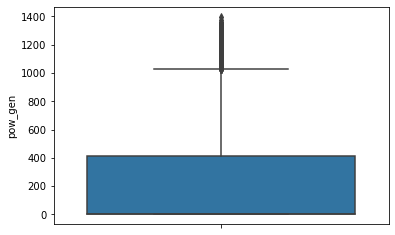

In [104]:
sns.boxplot(y = dataframe['pow_gen'] );

In [105]:
quantile_25 = np.quantile(dataframe['pow_gen'], 0.25)
quantile_75 = np.quantile(dataframe['pow_gen'],0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR
print(minimum, maximum)

-617.60175 1029.33625


In [106]:
dataframe.drop(dataframe[dataframe.pow_gen >= 1029.33625]. index, inplace = True)

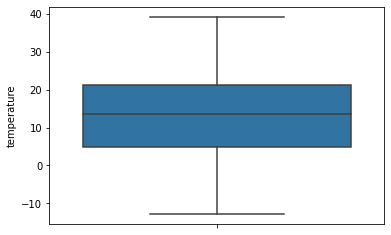

In [107]:
sns.boxplot(y = dataframe['temperature'] );

In [108]:
quantile_25 = np.quantile(dataframe['temperature'], 0.25)
quantile_75 = np.quantile(dataframe['temperature'],0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR
print(minimum, maximum)

-19.450000000000003 45.75


In [109]:
dataframe.drop(dataframe[dataframe.temperature >= 45.75]. index, inplace = True)

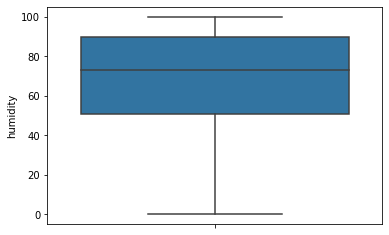

In [110]:
sns.boxplot(y = dataframe['humidity'] );

In [111]:
quantile_25 = np.quantile(dataframe['humidity'], 0.25)
quantile_75 = np.quantile(dataframe['humidity'],0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR
print(minimum, maximum)

-7.5 148.5


In [112]:
dataframe.drop(dataframe[dataframe.humidity >= 148.5]. index, inplace = True)

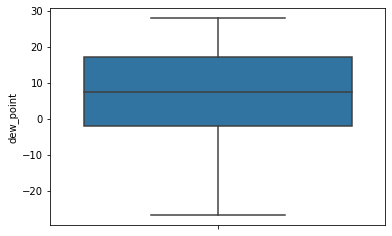

In [113]:
sns.boxplot(y = dataframe['dew_point'] );

In [114]:
quantile_25 = np.quantile(dataframe['dew_point'], 0.25)
quantile_75 = np.quantile(dataframe['dew_point'],0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR
print(minimum, maximum)

-31.150000000000002 46.050000000000004


In [115]:
dataframe.drop(dataframe[dataframe.dew_point >= 46.050000000000004]. index, inplace = True)

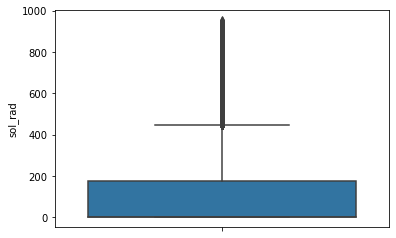

In [116]:
sns.boxplot(y = dataframe['sol_rad'] );

In [117]:
quantile_25 = np.quantile(dataframe['sol_rad'], 0.25)
quantile_75 = np.quantile(dataframe['sol_rad'],0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR
print(minimum, maximum)

-266.667 444.44499999999994


In [118]:
dataframe.drop(dataframe[dataframe.dew_point >= 444.44499999999994]. index, inplace = True)

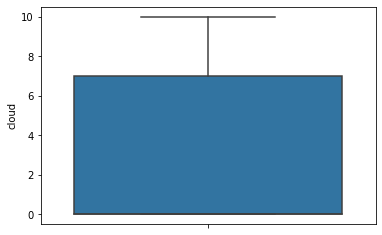

In [119]:
sns.boxplot(y = dataframe['cloud'] );

In [120]:
quantile_25 = np.quantile(dataframe['cloud'], 0.25)
quantile_75 = np.quantile(dataframe['cloud'],0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR
print(minimum, maximum)

-10.5 17.5


In [121]:
dataframe.drop(dataframe[dataframe.dew_point >= 17.5]. index, inplace = True)

Text(0, 0.5, 'pow_gen')

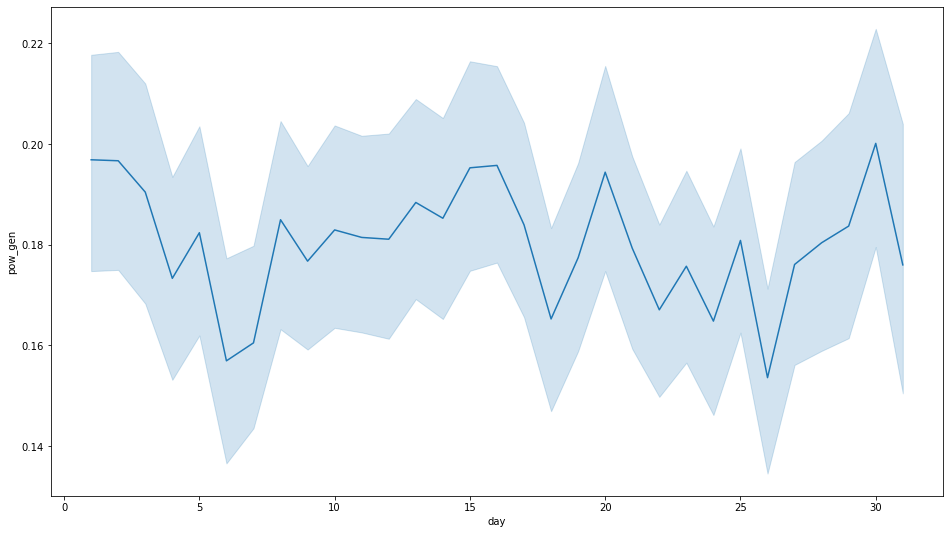

In [139]:
#10시~15시는 pow_gen이 다른 시간대에 비하여 훨씬 높은 수치! 왜 그럴까? 
plt.figure(figsize=(16, 9))
sns.lineplot(y=dataframe['pow_gen'], x=dataframe['day'])
plt.xlabel('day')
plt.ylabel('pow_gen')

In [123]:
dataframe.describe()

,year,month,day,hour,pow_gen,temperature,humidity,dew_point,sol_rad,cloud
count,25553.000000,25553.000000,25553.000000,25553.000000,25553.000000,25553.000000,25553.000000,25553.000000,25553.000000,25553.000000
mean,2018.450358,6.366493,15.846789,11.385317,185.442600,9.623665,64.381051,2.179936,115.853330,2.652252
std,1.161391,3.942382,8.690990,7.121679,301.654632,8.400420,23.444417,9.769439,194.881219,3.802384
min,2016.000000,1.000000,1.000000,0.000000,0.000000,-12.900000,0.000000,-26.900000,0.000000,0.000000
25%,2017.000000,3.000000,8.000000,5.000000,0.000000,3.000000,46.000000,-5.000000,0.000000,0.000000
50%,2018.000000,5.000000,16.000000,11.000000,0.000000,9.200000,65.000000,2.900000,0.000000,0.000000
75%,2019.000000,10.000000,23.000000,18.000000,279.659000,16.200000,85.000000,10.500000,169.444000,6.000000
max,2020.000000,12.000000,31.000000,23.000000,1029.248000,39.200000,100.000000,17.400000,955.556000,10.000000


In [124]:
from sklearn.preprocessing import MinMaxScaler

dataframe.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['pow_gen', 'temperature', 'humidity', 'dew_point', 'sol_rad', 'cloud']
df_scaled = scaler.fit_transform(dataframe[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled

,pow_gen,temperature,humidity,dew_point,sol_rad,cloud
0,0.136635,0.330134,0.77,0.620767,0.104651,0.0
1,0.083355,0.330134,0.80,0.632054,0.075581,0.0
2,0.031664,0.320537,0.80,0.620767,0.058140,0.0
3,0.000150,0.312860,0.80,0.611738,0.014535,0.0
4,0.000000,0.297505,0.86,0.616253,0.002907,0.0
...,...,...,...,...,...,...
25548,0.000000,0.230326,0.65,0.458239,0.000000,0.8
25549,0.000000,0.218810,0.66,0.449210,0.000000,0.8
25550,0.000000,0.211132,0.75,0.478555,0.000000,0.8
25551,0.000000,0.195777,0.73,0.453725,0.000000,0.8


In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

dataframe[['pow_gen']] = scaler.fit_transform(dataframe[['pow_gen']])
dataframe[['temperature']] = scaler.fit_transform(dataframe[['temperature']])
dataframe[['humidity']] = scaler.fit_transform(dataframe[['humidity']])
dataframe[['dew_point']] = scaler.fit_transform(dataframe[['dew_point']])
dataframe[['sol_rad']] = scaler.fit_transform(dataframe[['sol_rad']])
dataframe[['cloud']] = scaler.fit_transform(dataframe[['cloud']])

In [126]:
dataframe.describe()

,year,month,day,hour,pow_gen,temperature,humidity,dew_point,sol_rad,cloud
count,25553.000000,25553.000000,25553.000000,25553.000000,25553.000000,25553.000000,25553.000000,25553.000000,25553.000000,25553.000000
mean,2018.450358,6.366493,15.846789,11.385317,0.180173,0.432316,0.643811,0.656432,0.121242,0.265225
std,1.161391,3.942382,8.690990,7.121679,0.293083,0.161236,0.234444,0.220529,0.203945,0.380238
min,2016.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,3.000000,8.000000,5.000000,0.000000,0.305182,0.460000,0.494357,0.000000,0.000000
50%,2018.000000,5.000000,16.000000,11.000000,0.000000,0.424184,0.650000,0.672686,0.000000,0.000000
75%,2019.000000,10.000000,23.000000,18.000000,0.271712,0.558541,0.850000,0.844244,0.177325,0.600000
max,2020.000000,12.000000,31.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [127]:
dataframe

,date,year,month,day,hour,pow_gen,temperature,humidity,dew_point,sol_rad,cloud
0,2016-12-13-14,2016,12,13,14,0.136635,0.330134,0.77,0.620767,0.104651,0.0
1,2016-12-13-15,2016,12,13,15,0.083355,0.330134,0.80,0.632054,0.075581,0.0
2,2016-12-13-16,2016,12,13,16,0.031664,0.320537,0.80,0.620767,0.058140,0.0
3,2016-12-13-17,2016,12,13,17,0.000150,0.312860,0.80,0.611738,0.014535,0.0
4,2016-12-13-18,2016,12,13,18,0.000000,0.297505,0.86,0.616253,0.002907,0.0
...,...,...,...,...,...,...,...,...,...,...,...
35482,2020-12-31-19,2020,12,31,19,0.000000,0.230326,0.65,0.458239,0.000000,0.8
35483,2020-12-31-20,2020,12,31,20,0.000000,0.218810,0.66,0.449210,0.000000,0.8
35484,2020-12-31-21,2020,12,31,21,0.000000,0.211132,0.75,0.478555,0.000000,0.8
35485,2020-12-31-22,2020,12,31,22,0.000000,0.195777,0.73,0.453725,0.000000,0.8


In [128]:
TEST_SIZE = 100
WINDOW_SIZE = 30

train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [129]:
def make_dataset(data, label, window_size=30):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [130]:
from sklearn.model_selection import train_test_split

feature_cols = ['temperature', 'humidity', 'dew_point', 'sol_rad', 'cloud']
label_cols = ['pow_gen']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 30)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((20338, 30, 5), (5085, 30, 5))

In [131]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((100, 5), (100, 1))

In [132]:
test_feature, test_label = make_dataset(test_feature, test_label, 30)
test_feature.shape, test_label.shape

((70, 30, 5), (70, 1))

In [133]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(20, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

In [134]:
import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/200
1271/1272 [============================>.] - ETA: 0s - loss: 0.0409
Epoch 1: val_loss improved from inf to 0.02579, saving model to model\tmp_checkpoint.h5
1272/1272 [==============================] - 20s 14ms/step - loss: 0.0409 - val_loss: 0.0258
Epoch 2/200
1269/1272 [============================>.] - ETA: 0s - loss: 0.0264
Epoch 2: val_loss improved from 0.02579 to 0.02475, saving model to model\tmp_checkpoint.h5
1272/1272 [==============================] - 17s 13ms/step - loss: 0.0263 - val_loss: 0.0248
Epoch 3/200
1270/1272 [============================>.] - ETA: 0s - loss: 0.0250
Epoch 3: val_loss did not improve from 0.02475
1272/1272 [==============================] - 17s 13ms/step - loss: 0.0250 - val_loss: 0.0259
Epoch 4/200
1270/1272 [============================>.] - ETA: 0s - loss: 0.0240
Epoch 4: val_loss improved from 0.02475 to 0.02308, saving model to model\tmp_checkpoint.h5
1272/1272 [==============================] - 17s 13ms/step - loss: 0.0240 - val_lo

In [136]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(test_label, pred)**0.5
print(RMSE)

0.12913044207507227


In [135]:
#LSTM 모델 평가
ev=model.evaluate(test_feature,test_label, verbose=0)
print("손실 함수", ev[0], "MAE:",ev[1])

TypeError: 'float' object is not subscriptable

In [ ]:
#LSTM 모델로 예측 수행
pred=model.predict(x_test)
print("평균 절댓값 백분율 오차(MAPE)", sum(abs(test_label-pred)/test_label)/len(test_feature))

In [ ]:
model.load_weights(filename)
pred = model.predict(test_feature)
pred.shape

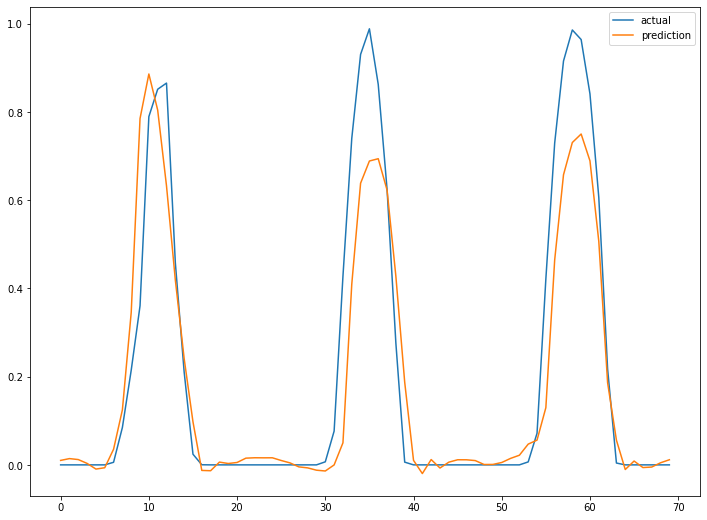

In [52]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                2080      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 2,101
Trainable params: 2,101
Non-trainable params: 0
_________________________________________________________________


In [60]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

X1_var = dataframe[['temperature', 'humidity', 'dew_point', 'sol_rad', 'cloud']]
y_var = dataframe['pow_gen'] # dependent variable
X_train, X_test, y_train, y_test = train_test_split(X1_var, y_var, test_size = 0.3, random_state = 0)

NameError: name 'df' is not defined

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

In [59]:
from termcolor import colored as cl
print(cl('R-Squared :', attrs = ['bold']), 
lr.score(X_test, y_test))

R-Squared : 0.5347474444341092


Text(0, 0.5, 'pow_gen')

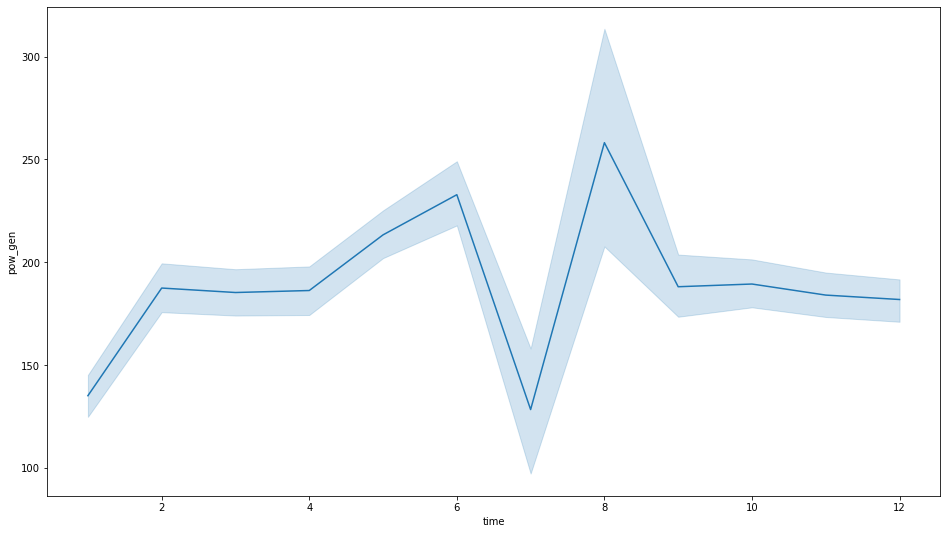

In [33]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=dataframe['pow_gen'], x=dataframe['month'])
plt.xlabel('time')
plt.ylabel('pow_gen')

In [59]:
stock_pow_gen=dataframe[['pow_gen']]
split_date = pd.Timestamp('2019-12-31')

#학습용 데이터와 테스트용 데이터로 분리
train_data=pd.DataFrame(stock_pow_gen.loc[:split_date,['Close']])
test_data=pd.DataFrame(stock_pow_gen.loc[split_date:,['Close']])

#분리된 데이터 시각화
ax = train_data.plot()
test_data.plot(ax=ax)
plt.legend(['train', 'test'])

TypeError: '<' not supported between instances of 'int' and 'Timestamp'

In [ ]:
#LSTM 모델에 맞게 데이터 셋 변형
x_train_t = x_train.reshape(x_train.shape[0], 30,1)
x_test_t = x_test.reshape(x_test.shape[0], 30, 1)

from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping 

K.clear_session() 
# Sequeatial Model
model = Sequential() 

# 첫번째 LSTM 레이어
model.add(LSTM(30,return_sequences=True, input_shape=(30, 1))) 
# 두번째 LSTM 레이어
model.add(LSTM(42,return_sequences=False))  

# 예측값 1개
model.add(Dense(1, activation='linear')) 
# 손실함수 지정 - 예측 값과 실제 값의 차이를 계산한다. MSE가 사용된다. 
# 최적화기 지정 - 일반적으로 adam을 사용한다.
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

<AxesSubplot:>

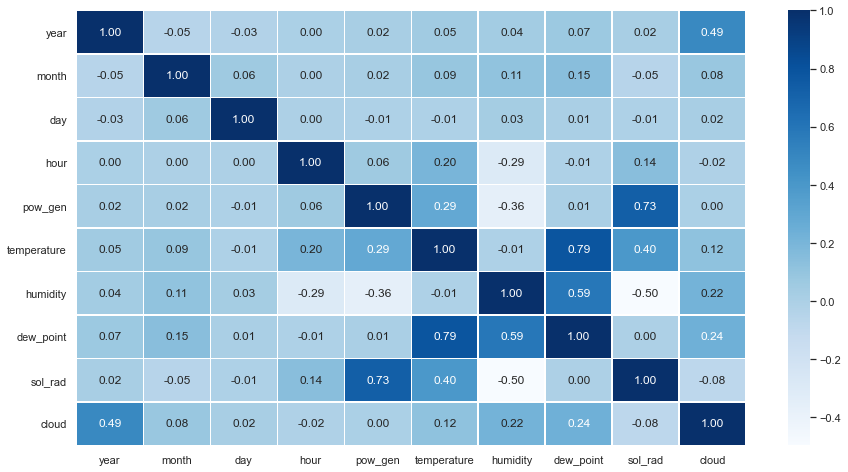

In [34]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.heatmap(dataframe.corr(), annot=True, linewidths=0.5, fmt=".2f", cmap="Blues")

In [35]:
dataframe2 = dataframe[['pow_gen', 'temperature', 'humidity', 'dew_point', 'sol_rad', 'cloud']]
dataframe2

,pow_gen,temperature,humidity,dew_point,sol_rad,cloud
0,0.136635,0.330134,0.77,0.620767,0.104651,0.0
1,0.083355,0.330134,0.80,0.632054,0.075581,0.0
2,0.031664,0.320537,0.80,0.620767,0.058140,0.0
3,0.000150,0.312860,0.80,0.611738,0.014535,0.0
4,0.000000,0.297505,0.86,0.616253,0.002907,0.0
...,...,...,...,...,...,...
35482,0.000000,0.230326,0.65,0.458239,0.000000,0.8
35483,0.000000,0.218810,0.66,0.449210,0.000000,0.8
35484,0.000000,0.211132,0.75,0.478555,0.000000,0.8
35485,0.000000,0.195777,0.73,0.453725,0.000000,0.8


<AxesSubplot:>

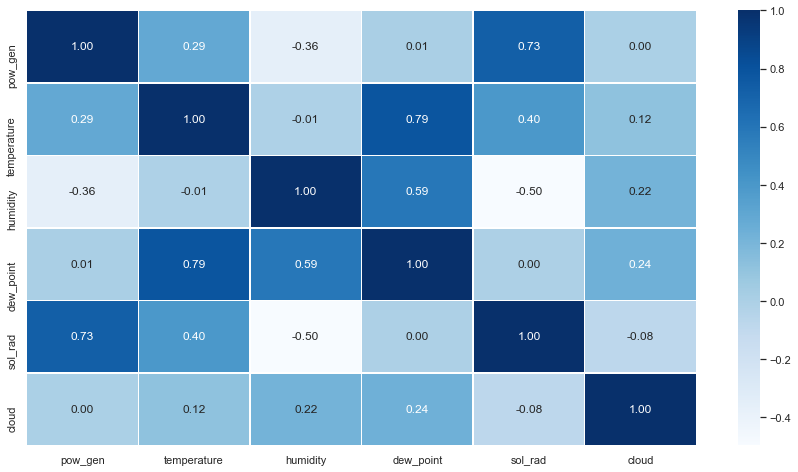

In [36]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.heatmap(dataframe2.corr(), annot=True, linewidths=0.5, fmt=".2f", cmap="Blues")

In [37]:
dataframe

,date,year,month,day,hour,pow_gen,temperature,humidity,dew_point,sol_rad,cloud
0,2016-12-13-14,2016,12,13,14,0.136635,0.330134,0.77,0.620767,0.104651,0.0
1,2016-12-13-15,2016,12,13,15,0.083355,0.330134,0.80,0.632054,0.075581,0.0
2,2016-12-13-16,2016,12,13,16,0.031664,0.320537,0.80,0.620767,0.058140,0.0
3,2016-12-13-17,2016,12,13,17,0.000150,0.312860,0.80,0.611738,0.014535,0.0
4,2016-12-13-18,2016,12,13,18,0.000000,0.297505,0.86,0.616253,0.002907,0.0
...,...,...,...,...,...,...,...,...,...,...,...
35482,2020-12-31-19,2020,12,31,19,0.000000,0.230326,0.65,0.458239,0.000000,0.8
35483,2020-12-31-20,2020,12,31,20,0.000000,0.218810,0.66,0.449210,0.000000,0.8
35484,2020-12-31-21,2020,12,31,21,0.000000,0.211132,0.75,0.478555,0.000000,0.8
35485,2020-12-31-22,2020,12,31,22,0.000000,0.195777,0.73,0.453725,0.000000,0.8
